In [55]:
import pandas as pd
import matplotlib.pyplot as plt

### Jupyer часть

Подготовка данных

In [56]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')
test_full = test.merge(gender, on='PassengerId', how='left')

In [57]:
data = pd.concat([train, test_full], axis=0, sort=False, ignore_index=True)

In [58]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [61]:
data['Survived'] = data['Survived'].astype('category')
data['Pclass'] = data['Pclass'].astype('category')
data['Sex'] = data['Sex'].astype('category')
data['Embarked'] = data['Embarked'].astype('category')
data['Cabin'] = data['Cabin'].astype('category')

In [62]:
print(data['Age'].isna().sum()) #1309 - 1046 = 263
print(data['Cabin'].isna().sum())#1309 - 1014 = 295
print(data['Fare'].isna().sum())#1309-1308 = 1
print(data['Embarked'].isna().sum())#1309-1307 = 2


263
1014
1
2


с помощью команды выше можно посчитать все Nan значения и если вычесть из всех значений не нулевые значения то получатся количество Nan, значит все пустые значения - Nan

#### Анализ данных

В каком классе было больше всего пассажиров?

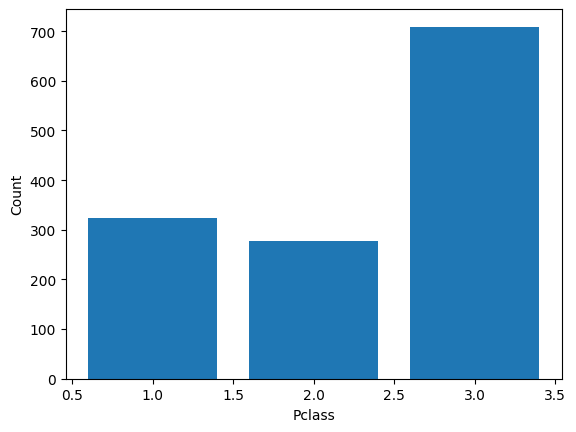

In [63]:
df = data['Pclass'].value_counts()

plt.bar(df.index, df.values)
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

In [64]:
data['Pclass'].value_counts()

,count
Pclass,
3,709
1,323
2,277


Ответ:

Больше всего было пассажиров 3 класса

Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

In [65]:
grouped = data.groupby(['Pclass', 'Sex'], observed=True)['Age'].mean()#группируем по классу и полу
grouped

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

Ответ:

Самый юный - женщина 3 класса
Самый взрослый - мужчина 1 класса

In [66]:
youngest_group = grouped.idxmin()
youngest_age = grouped.min()#минимум

oldest_group = grouped.idxmax()
oldest_age = grouped.max()#максимум

diff = oldest_age - youngest_age
diff

18.843942575810384

Значения отличаются на 18.84

Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?

In [67]:
grouped = data[(data['Survived'] == 1) & (data['Name'].str.startswith('K', na = False))]

max_fare = grouped['Fare'].max()
richest = grouped[grouped['Fare'] == max_fare]

min_fare = grouped['Fare'].min()
poorest = grouped[grouped['Fare'] == min_fare]
print(richest[['Name', 'Fare']])
print(poorest[['Name', 'Fare']])

                        Name      Fare
1215  Kreuchen, Miss. Emilie  211.3375
                                         Name  Fare
300  Kelly, Miss. Anna Katherine "Annie Kate"  7.75
573                         Kelly, Miss. Mary  7.75


Ответ:

Больше  всего заплатила  Kreuchen, Miss. Emilie, а меньше всех заплатили  Kelly, Miss. Anna Katherine "Annie Kate" и  Kelly, Miss. Mary

Какое максимальное количество родных было с выжившим пассажиром?

In [68]:
survived = data[data['Survived'] == 1].copy()

survived['Total_Relatives'] = survived['SibSp'] + survived['Parch']


max_relatives = survived['Total_Relatives'].max()
max_relatives_passengers = survived[survived['Total_Relatives'] == max_relatives]
print(max_relatives_passengers[['Name', 'Total_Relatives']])

                                Name  Total_Relatives
1079                 Sage, Miss. Ada               10
1256  Sage, Mrs. John (Annie Bullen)               10


Ответ:

Sage, Miss. Ada, Sage, Mrs. John (Annie Bullen) - у этих людей было наибольшее количество родственников на борту - 10

#### Визуализация

In [69]:
import seaborn as sns

1.Scatter plot

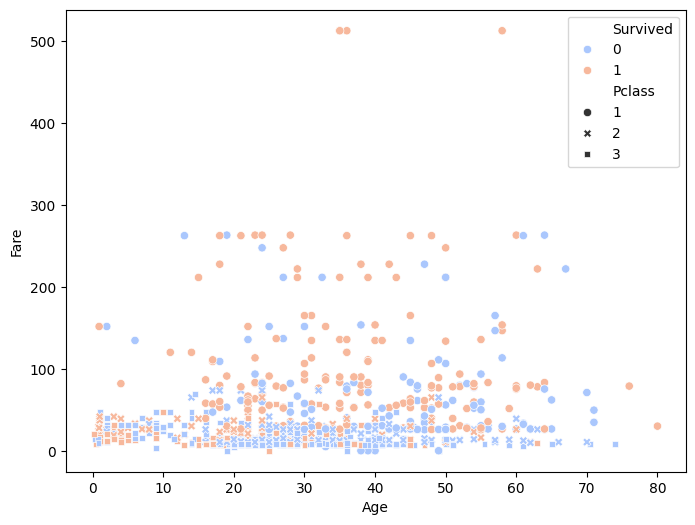

In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', style='Pclass', palette='coolwarm')
plt.show()

Этот график показывает связь выживаемости от возраста, цены билета и класса.



2. Histogram

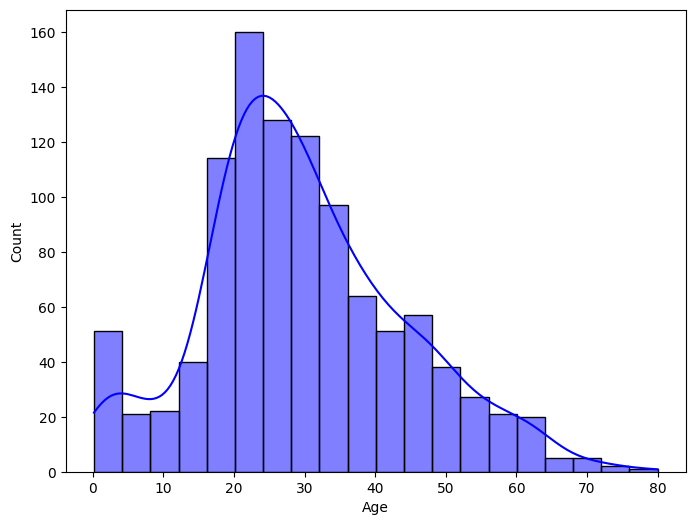

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'].dropna(), bins=20, kde=True, color='blue')
plt.show()

Этот график показывает количество различных возрастных групп на корабле

3. Box chart

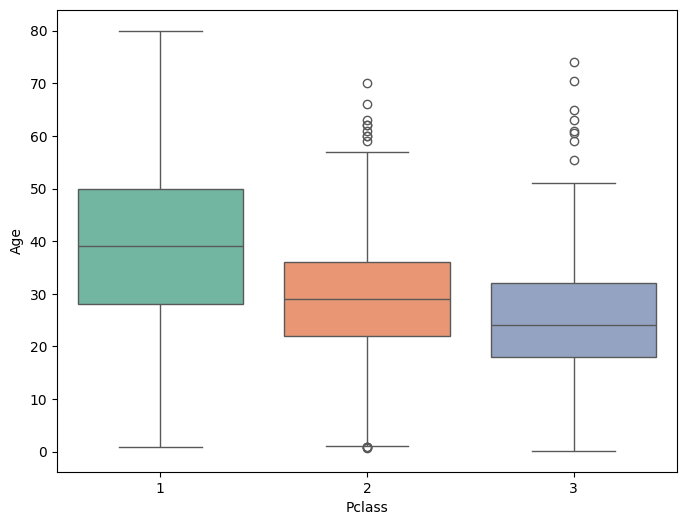

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Age', hue='Pclass', palette='Set2', legend=False)
plt.show()

Этот график показывает распределение возраста внутри каждого класса.

4. Linear plot with several lines

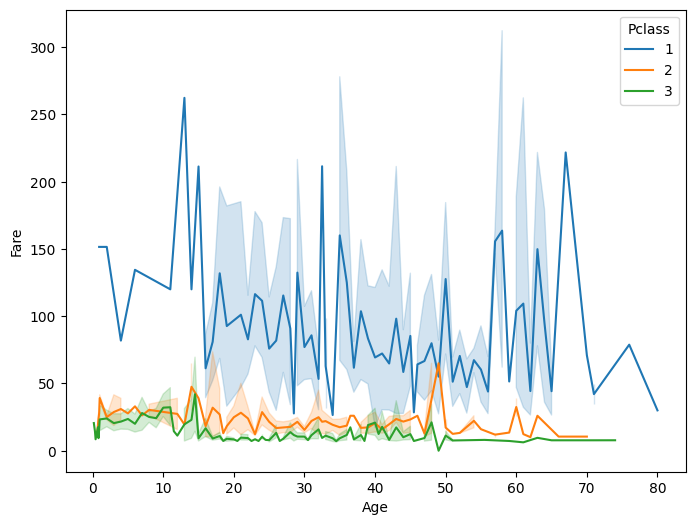

In [73]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=data, x='Age', y='Fare', hue='Pclass', markers=True)
plt.show()

Этот график показывает зависимость стоимости билета от возраста, и разделяет линии по классам кают.

5.Sunburst chart (Plotly)

In [74]:
import plotly.express as px
sunburst_data = data.groupby(['Pclass', 'Sex', 'Survived'], observed=False).size().reset_index(name='count')
fig = px.sunburst(
    data_frame=sunburst_data,
    path=['Pclass', 'Sex', 'Survived'],
    values='count'
)

fig.show()

Этот график показывает, как распределяются пассажиры по классу, полу и выживанию.

6. Horizontal Bar Chart (Plotly)

In [75]:
fig = px.bar(
    data_frame=data,
    y="Sex",
    color="Survived",
    barmode="group",
    orientation="h"
)
fig.show()

Этот график показывает, как количество пассажиров распределяется по полу и статусу выживания.

7. Pie Chart (Plotly)

In [76]:
survival_counts = data['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']

fig = px.pie(
    survival_counts,
    names='Survived',
    values='Count',
    color='Survived',
    color_discrete_map={0: 'lightcoral', 1: 'lightgreen'}
)
fig.show()

Этот график показывает, какая доля пассажиров выжила и какая погибла.

8. Sunburst (Plotly)

In [77]:
import plotly.express as px

fig = px.scatter(data_frame=data,
                 x='Age',
                 y='Fare',
                 size='SibSp',
                 color='Survived',
                 hover_name='Name',
                 title="Interactive Bubble Chart: Age vs Fare with SibSp as Bubble Size",
                 labels={"Age": "Passenger Age", "Fare": "Ticket Fare", "SibSp": "Number of Siblings/Spouses"})

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Fare",
    showlegend=True
)

fig.show()


Этот график показывает взаимосвязь между возрастом пассажиров и стоимостью их билета. Размер каждого пузырька зависит от количества братьев/сестер и супругов пассажира на борту, а цвет пузырьков указывает на выживание пассажира. Таким образом, график позволяет увидеть, как возраст, стоимость билета и количество родных связаны с выживанием.

#### 9. Interactive Histogram

In [78]:
import plotly.express as px
fig = px.histogram(data_frame=data, x='Age', nbins=30, color='Pclass')
fig.show()


Эта диаграмма показывает распределение возраста пассажиров по классам

10. 3D диаграмма

In [79]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df2 = data[['Age', 'Pclass', 'Fare']].dropna()

age = df2['Age']
pclass = df2['Pclass']
fare = df2['Fare']

fig = go.Figure(data=[go.Mesh3d(
    x=age,
    y=pclass,
    z=fare,
    opacity=0.5,
    color='lightblue'
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Pclass',
        zaxis_title='Fare'
    )
)

fig.show()


Этот 3D график показывает, как возраст пассажира, его класс и стоимость билета связаны друг с другом. Каждая точка это пассажир в трёхмерном пространстве: по оси X возраст, по оси Y класс, по оси Z цена билета.

 + Создадим Sankey Diagram

In [80]:
sankey_data = data.groupby(['Pclass', 'Sex', 'Survived'], observed=False).size().reset_index(name='Count')

labels = ['1st Class Male Survived', '1st Class Male Died', '1st Class Female Survived', '1st Class Female Died',
          '2nd Class Male Survived', '2nd Class Male Died', '2nd Class Female Survived', '2nd Class Female Died',
          '3rd Class Male Survived', '3rd Class Male Died', '3rd Class Female Survived', '3rd Class Female Died']

sources = []
targets = []
values = []

for _, row in sankey_data.iterrows():
    pclass = row['Pclass']
    sex = row['Sex']
    survived = row['Survived']
    count = row['Count']

    source_idx = (pclass - 1) * 2 + (0 if sex == 'male' else 1)
    target_idx = (pclass - 1) * 2 + (2 if survived == 1 else 3)

    sources.append(source_idx)
    targets.append(target_idx)
    values.append(count)

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.show()

Этот график визуализирует поток пассажиров от их класса и пола к исходу выжил или нет.